In [1]:
# 
import csv
import ast
def tsv_read(path):
    dati = []
    with open(path, 'r', newline='', encoding='utf-8') as file_tsv:
        lettore_tsv = csv.DictReader(file_tsv, delimiter='\t')
        
        for riga in lettore_tsv:
            print(riga)

            # Converti le stringhe contenenti rappresentazioni di liste in liste Python
            for chiave, valore in riga.items():
                print(f'{chiave} {valore}')
                try:
                    riga[chiave] = ast.literal_eval(valore)
                    print(f'QUI {ast.literal_eval(valore)}')
                except (SyntaxError, ValueError):
                    pass
            dati.append(dict(riga))
    return dati



In [2]:
import pandas as pd
test = pd.read_csv("Cora_0005.tsv", sep='\t', skiprows=10)

In [3]:
test.head()

,Frame,Time,SMPTE,ARIEL X,ARIEL Y,ARIEL Z,LFHD X,LFHD Y,LFHD Z,RFHD X,...,LMID X,LMID Y,LMID Z,LTHMB X,LTHMB Y,LTHMB Z,RBWT X,RBWT Y,RBWT Z,Unnamed: 189
0,1,0.00,00:09:11.04:02,-173.934,1632.858,820.979,-234.758,1553.006,722.088,-98.818,...,-412.887,687.385,687.197,-373.079,717.575,684.448,-9.995,931.390,889.527,NaN
1,2,0.01,00:09:11.04:03,-173.421,1633.013,821.402,-234.185,1552.871,722.704,-98.284,...,-412.946,687.291,689.773,-373.333,717.518,686.747,-9.890,931.355,890.399,NaN
2,3,0.02,00:09:11.05:00,-172.992,1633.156,821.831,-233.620,1552.767,723.280,-97.853,...,-413.144,687.099,692.405,-373.476,717.380,689.150,-9.803,931.366,891.216,NaN
3,4,0.03,00:09:11.05:01,-172.575,1633.288,822.296,-233.033,1552.662,723.874,-97.171,...,-412.904,686.381,694.131,-373.721,716.974,691.430,-9.686,930.806,892.021,NaN
4,5,0.04,00:09:11.05:02,-172.107,1633.304,822.763,-232.531,1552.603,724.487,-96.679,...,-413.100,686.016,696.865,-373.859,716.558,694.024,-9.592,930.881,892.907,NaN


In [14]:
import matplotlib.pyplot as plt
import numpy as np
test = test.drop(['Frame','Time','SMPTE'], axis=1)

In [26]:
import numpy as np
from scipy.signal import butter,filtfilt
# Filter requirements.

fs = 100.0       # sample rate, Hz
#cutoff = 2      # desired cutoff frequency of the filter, Hz ,      slightly higher than actual 1.2 Hz
nyq = 0.5 * fs  # Nyquist Frequency
#order = 2       # sin wave can be approx represented as quadratic
#n = int(T * fs) # total number of samples

def butter_lowpass_filter(data, cutoff, fs, order):
    normal_cutoff = cutoff / nyq
    # Get the filter coefficients 
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

In [40]:
import numpy as np
from scipy.signal import butter, lfilter, freqz
import matplotlib.pyplot as plt


def butter_lowpass(cutoff, fs, order=5):
    return butter(order, cutoff, fs=fs, btype='low', analog=False)

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y


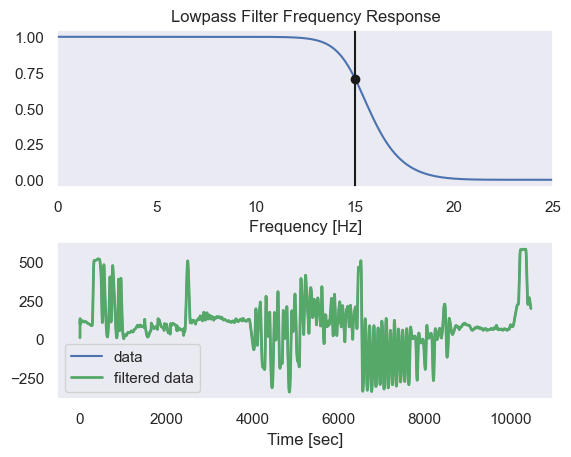

In [59]:
# Filter requirements.
order = 6
fs = 50.0       # sample rate, Hz
cutoff = 15  # desired cutoff frequency of the filter, Hz

# Get the filter coefficients so we can check its frequency response.
b, a = butter_lowpass(cutoff, fs, order)

# Plot the frequency response.
w, h = freqz(b, a, fs=fs, worN=8000)
plt.subplot(2, 1, 1)
plt.plot(w, np.abs(h), 'b')
plt.plot(cutoff, 0.5*np.sqrt(2), 'ko')
plt.axvline(cutoff, color='k')
plt.xlim(0, 0.5*fs)
plt.title("Lowpass Filter Frequency Response")
plt.xlabel('Frequency [Hz]')
plt.grid()




# Filter the data, and plot both the original and filtered signals.
z = butter_lowpass_filter(test["RPLM X"], cutoff, fs, order)

plt.subplot(2, 1, 2)
plt.plot(np.arange(len(test["RPLM X"])), test["RPLM X"], 'b-', label='data')
plt.plot(np.arange(len(z)), z, 'g-', linewidth=2, label='filtered data')
plt.xlabel('Time [sec]')
plt.grid()
plt.legend()

plt.subplots_adjust(hspace=0.35)
plt.show()

In [38]:
# Filter the data, and plot both the original and filtered signals.
y = butter_lowpass_filter(test["RPLM X"], 1, fs, 2)


"\nfor idx,i in enumerate(test.columns):\n    plt.figure(figsize=(18,9))\n    plt.plot(np.arange(len(test.iloc[:,idx].values)),test.iloc[:,idx].values,'blue',linewidth=0.5)\n    plt.xlabel(i)\n    "

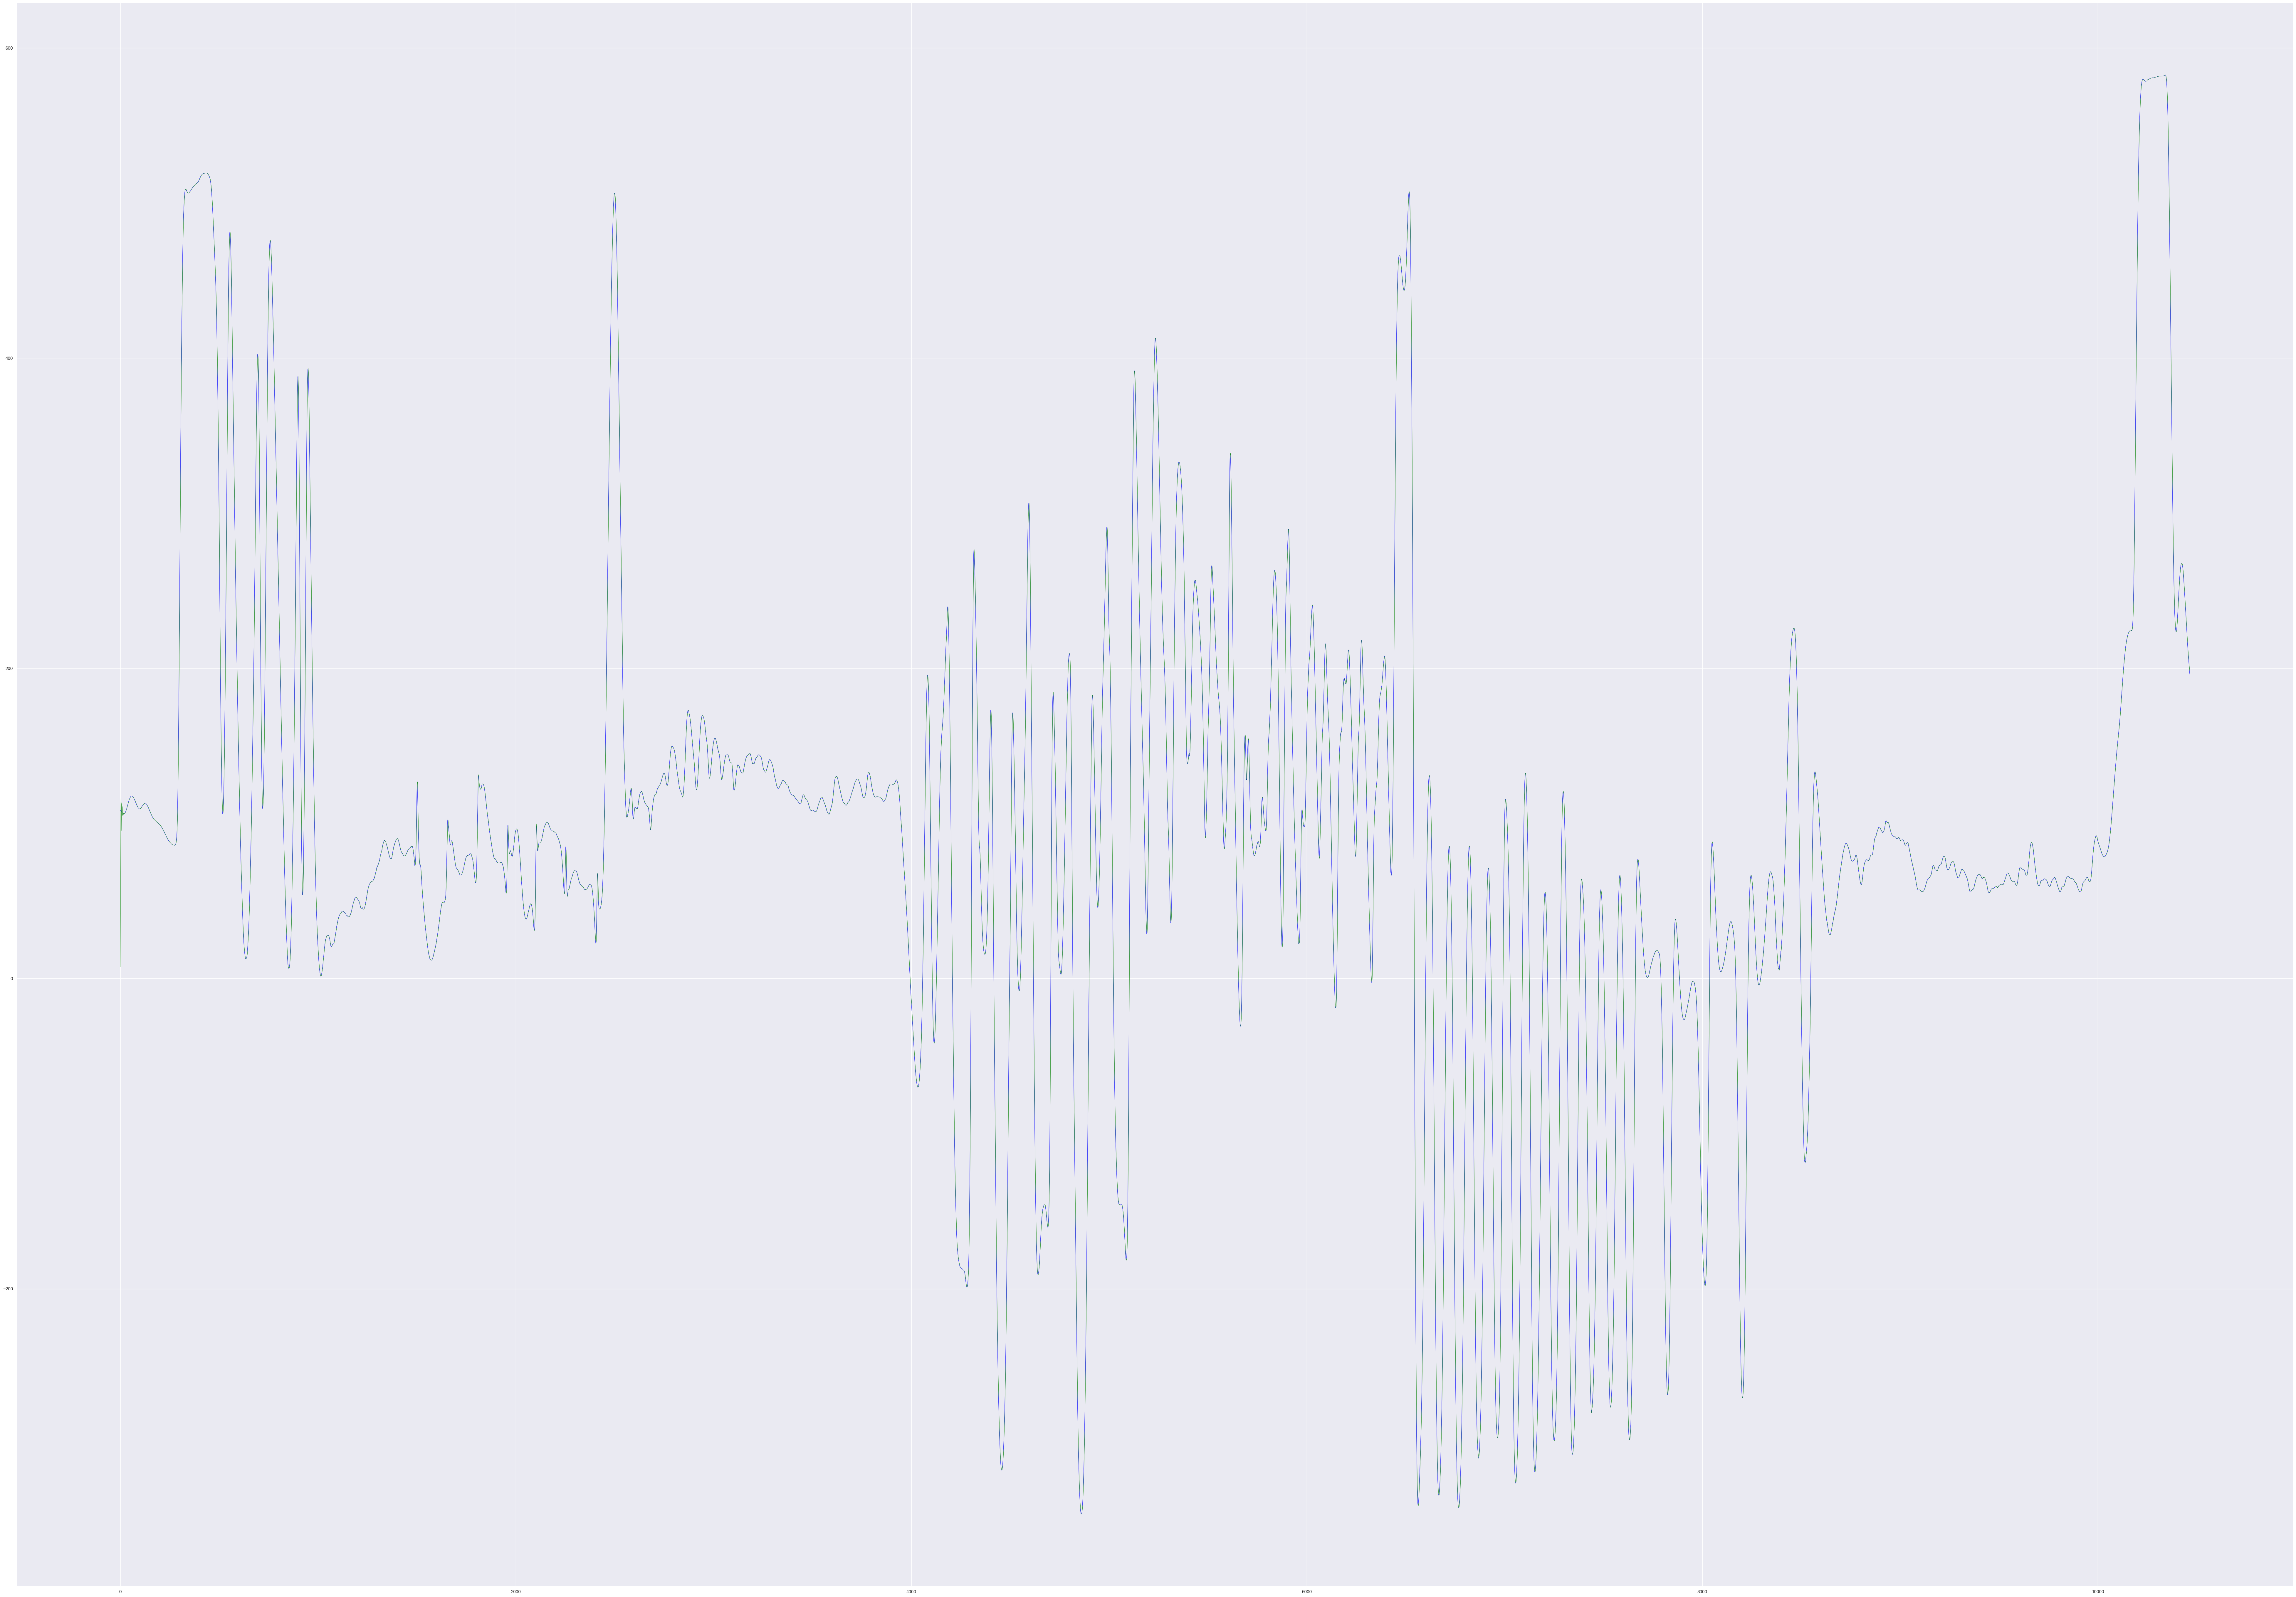

In [60]:
plt.figure(figsize=(100,70))
plt.plot(np.arange(len(test["RPLM X"].values)),test["RPLM X"].values,'blue',linewidth=0.5)

#plt.plot(np.arange(len(y)),y,'red',linewidth=0.5)

plt.plot(np.arange(len(z)),z,'green',linewidth=0.5)
"""
for idx,i in enumerate(test.columns):
    plt.figure(figsize=(18,9))
    plt.plot(np.arange(len(test.iloc[:,idx].values)),test.iloc[:,idx].values,'blue',linewidth=0.5)
    plt.xlabel(i)
    """